['', 'cgtaaccaataaaaaaacaagcttaacctaattc', 'agcttagtttggatctggccgggg', 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca', 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca']
[{'a': 17, 'c': 8, 'g': 2, 't': 7}, {'a': 3, 'c': 4, 'g': 10, 't': 7}, {'a': 18, 'c': 16, 'g': 16, 't': 10}, {'a': 13, 'c': 11, 'g': 18, 't': 10}]


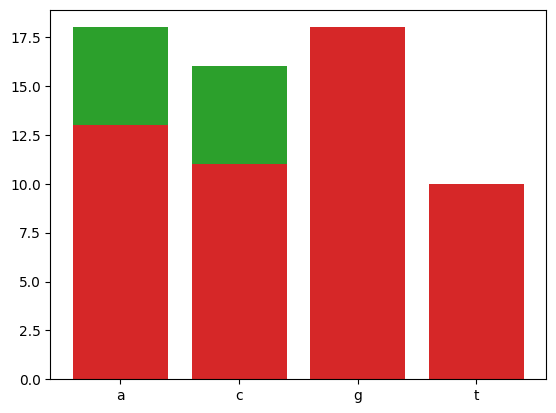

In [ ]:
#Task 1
import matplotlib.pyplot as plt
import numpy as np
data_path = "data"

path_dna = f"{data_path}/dna_raw.txt"
path_dna_complicated = f"{data_path}/dna_raw_complicated.txt"

def extract_clean_data(path):
    with open(path, "r") as file:
        text = file.read()

    #spliting the data and cleaning it
    texts = text.split(">seq")
    texts = [dna_text.strip("1234\n").lower() for dna_text in dna_texts] # TODO:find a way to clean numbers better with \d (need re.sub)
    return texts

dna_texts = extract_clean_data(path_dna)
print(dna_texts)
sequences = []
for text in dna_texts:
    #this is to exclude the first item of the list which is empty TDLR: did use chatgpt to find this problem and handle it
    if not text.strip(): #TODO: Find away to remove it in the cleaning part of the code
        continue
    sequence = dict(a = 0, c = 0, g = 0, t =0)
    for letter in text:
        if letter == "a":
            sequence["a"] += 1
        if letter == "c":
            sequence["c"] += 1
        if letter == "g":
            sequence["g"] += 1
        if letter == "t":
            sequence["t"] += 1
    sequences.append(sequence)
sequence
print(sequences)

for sequence in sequences:
    categories = np.array(["a","c","g","t"])
    plt.bar(categories, sequence.values())
        

#Use matplotlib to show each of the sequences in a bar graph
#Task 2


#Create a function that saves the number from the sequence as a key in dictionary and include everything in task 1 aswell